<a href="https://colab.research.google.com/github/waseda-ken/data_analyze_kikagaku/blob/main/%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90%E5%AE%9F%E8%B7%B5_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ー本章で行う内容

*   探索的データ分析
*   確証的データ分析（仮説検定）
 *   平均値の検定
 *   関連性の検定








In [ ]:
!pip install -q japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 24.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import japanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 6

In [ ]:
df = pd.read_csv('hotel_reviews.csv')
df.head()

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2
2,女性,22,グループ,その他,1,1,1,4,1,5,1,3,1,3
3,男性,30,個人,航空関係,3,4,3,4,5,1,4,4,5,3
4,男性,59,グループ,航空関係,4,3,3,3,4,4,3,5,4,4


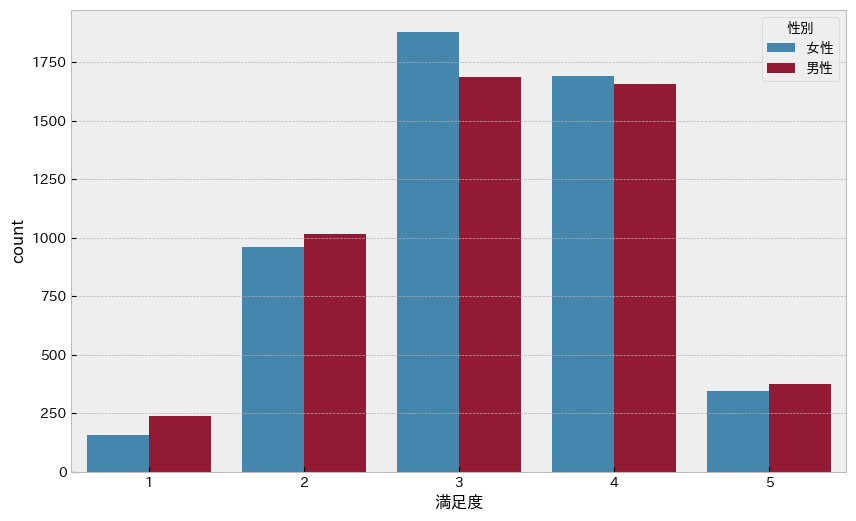

In [ ]:
sns.countplot(x='満足度', hue='性別', data=df);

In [ ]:
group = df.groupby('性別')
group['満足度'].agg(['mean', 'median'])

,mean,median
性別,,
女性,3.219638,3.0
男性,3.183940,3.0


##仮説立て
*   性別によって、満足度には差がある

##仮説が正しいか検証


In [ ]:
group1 = group.get_group('男性')
group2 = group.get_group('女性')

In [ ]:
group1.head(3)

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
3,男性,30,個人,航空関係,3,4,3,4,5,1,4,4,5,3
4,男性,59,グループ,航空関係,4,3,3,3,4,4,3,5,4,4
5,男性,52,グループ,学生,2,3,3,3,2,2,1,3,2,2


In [ ]:
group1['満足度']

,満足度
3,3
4,4
5,2
6,3
12,3
...,...
9993,3
9994,5
9996,3
9997,5


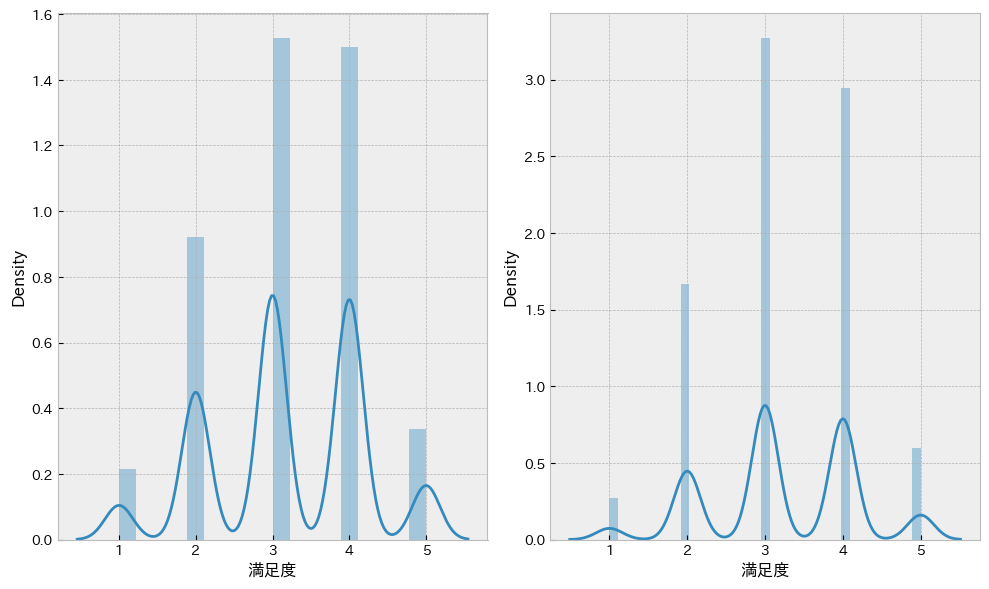

In [ ]:
# 可視化
plt.subplot(1, 2, 1)
sns.distplot(group1['満足度'])
plt.subplot(1, 2, 2)
sns.distplot(group2['満足度'])
plt.tight_layout()

In [ ]:
# コルモゴロフ・スミルノフ検定
stats.kstest(group1['満足度'],"norm",args=(group1['満足度'].mean(), group1['満足度'].std()))
#正規分布でない

KstestResult(statistic=np.float64(0.20191525204455174), pvalue=np.float64(4.5382865989037923e-178), statistic_location=np.int64(4), statistic_sign=np.int8(-1))

In [ ]:
stats.kstest(group2['満足度'],"norm",args=(group2['満足度'].mean(), group2['満足度'].std()))
#正規分布でない

KstestResult(statistic=np.float64(0.20223174406374667), pvalue=np.float64(7.438672124977484e-181), statistic_location=np.int64(4), statistic_sign=np.int8(-1))

仮説を立てる

帰無仮説（H_0）: 2 群間の平均値に差がない
対立仮説（H_1）: 2 群間の平均値に差がある

有意水準を決める

今回も 5% としておきます。

P 値を算出する

・母集団に正規分布を仮定できない → ノンパラメトリック検定

・対応がないデータ

よって、Mann-Whitney(マンホイットニー)の U 検定を使用します。

In [ ]:
stats.mannwhitneyu(group1['満足度'], group2['満足度'], alternative='two-sided')

MannwhitneyuResult(statistic=np.float64(12311050.0), pvalue=np.float64(0.1708277786931579))

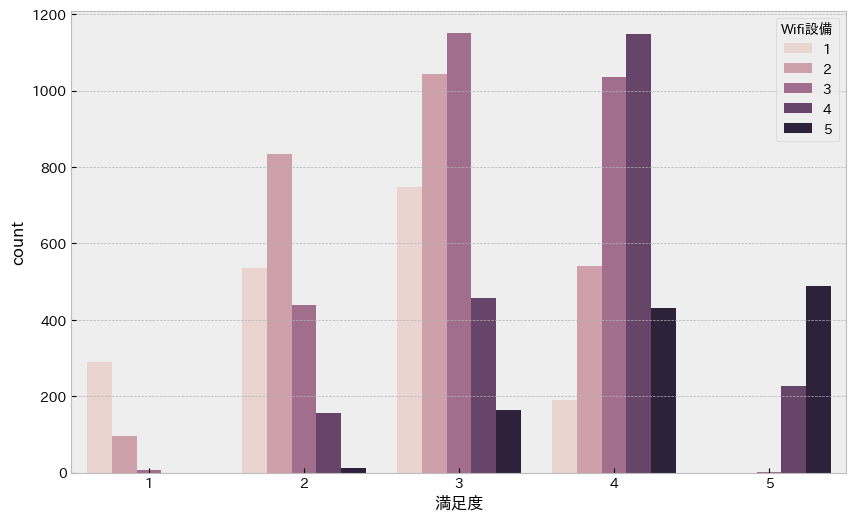

In [ ]:
sns.countplot(x='満足度', hue='Wifi設備', data=df);

In [ ]:
# WiFi設備の評価ごとの満足度の代表値
group = df.groupby('Wifi設備')
group['満足度'].agg(['mean', 'median'])

,mean,median
Wifi設備,,
1,2.476461,3.0
2,2.807234,3.0
3,3.221168,3.0
4,3.727364,4.0
5,4.274385,4.0


##Step２ 仮説立て
*   Wifi 設備と満足度は独立でなく何らかの関係性を持っているのではないか



##Step3 仮説が正しいか検証
* χ二乗検定
 * 帰無仮説：2群間は独立  
 * 対立仮説：2群感は独立でない（何らかの関連性を持ている）




In [ ]:
# 関数化しておく
crosstab = pd.crosstab(df['満足度'], df['Wifi設備'])
crosstab

Wifi設備,1,2,3,4,5
満足度,,,,,
1,289,96,8,0,0
2,535,835,439,155,12
3,749,1043,1152,458,164
4,190,542,1036,1149,432
5,0,0,1,226,489


In [ ]:
chi2, p, dof, ef = stats.chi2_contingency(crosstab, correction=False)
print(f'χ 二乗値:{chi2}')
print(f'p 値:{p}')
print(f'自由度:{dof}')

χ 二乗値:5356.10247526457
p 値:0.0
自由度:16


##Step1 集計・可視化

In [ ]:
group = df.groupby('Wifi設備')
group['満足度'].agg(['mean', 'median'])


,mean,median
Wifi設備,,
1,2.476461,3.0
2,2.807234,3.0
3,3.221168,3.0
4,3.727364,4.0
5,4.274385,4.0


In [ ]:
satis_0 = df.query('Wifi設備<=3')
satis_0.head(3)

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
2,女性,22,グループ,その他,1,1,1,4,1,5,1,3,1,3
3,男性,30,個人,航空関係,3,4,3,4,5,1,4,4,5,3
5,男性,52,グループ,学生,2,3,3,3,2,2,1,3,2,2


In [ ]:
satis_1 = df.query('Wifi設備>=4')
satis_1.head(3)

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2
4,男性,59,グループ,航空関係,4,3,3,3,4,4,3,5,4,4


In [ ]:
print(f'Wifi設備3以下：{satis_0["満足度"].mean()}')
print(f'Wifi設備4以上：{satis_1["満足度"].mean()}')

Wifi設備3以下：2.880694143167028
Wifi設備4以上：3.9218800648298218


##Step2 仮説立て
* Wifi 設備の評価が 4 以上の人は満足度を高くつける傾向になるのではないか

##Step3 仮説が正しいか検証

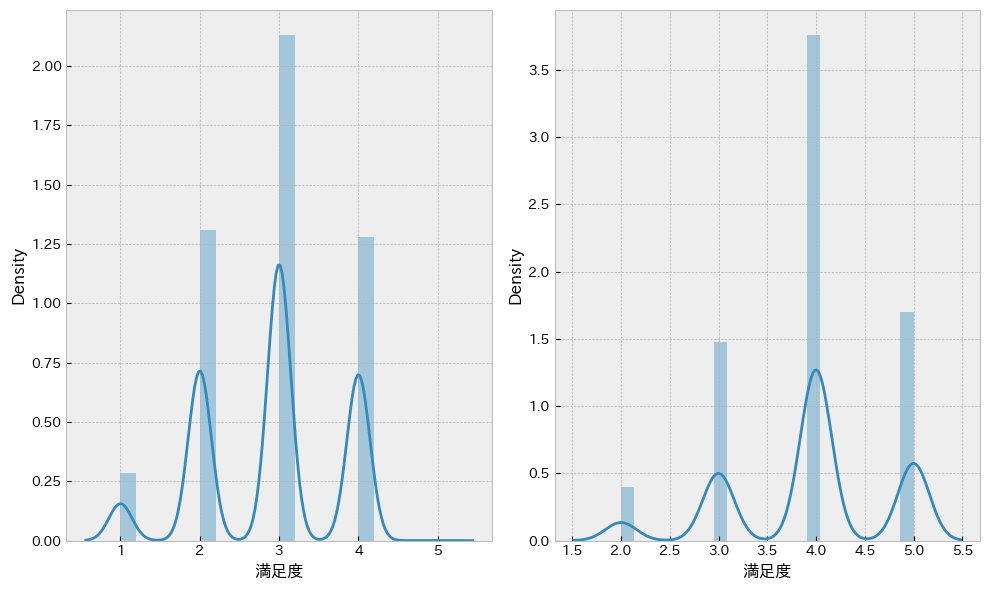

In [ ]:
plt.subplot(1, 2, 1)
sns.distplot(satis_0['満足度'])
plt.subplot(1, 2, 2)
sns.distplot(satis_1['満足度'])
plt.tight_layout()

In [ ]:
print(stats.kstest(satis_0['満足度'], "norm", args=(group1['満足度'].mean(), group1['満足度'].std())))
print(stats.kstest(satis_1['満足度'], "norm", args=(group1['満足度'].mean(), group1['満足度'].std())))

#両方正規分布でない

KstestResult(statistic=np.float64(0.317339652392472), pvalue=np.float64(0.0), statistic_location=np.int64(3), statistic_sign=np.int8(1))
KstestResult(statistic=np.float64(0.53762870136225), pvalue=np.float64(0.0), statistic_location=np.int64(4), statistic_sign=np.int8(-1))


仮説を立てる

帰無仮説（H_0）: 2 群間の平均値に差がない
対立仮説（H_1）: 2 群間の平均値に差がある

有意水準を決める

今回も 5% としておきます。


P 値を算出する

検定を行います。

今回は以下のような条件です。

母集団に正規分布を仮定できない → ノンパラメトリック検定

対応がないデータ

よって、Mann-Whitney(マンホイットニー)の U 検定を使用します。

In [ ]:
stats.mannwhitneyu(satis_0['満足度'], satis_1['満足度'], alternative='two-sided')

MannwhitneyuResult(statistic=np.float64(4353567.0), pvalue=np.float64(0.0))

#クラスタリング

In [ ]:
!pip install -q japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 34.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')


In [ ]:
df = pd.read_csv('hotel_reviews.csv')
df.head()

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2
2,女性,22,グループ,その他,1,1,1,4,1,5,1,3,1,3
3,男性,30,個人,航空関係,3,4,3,4,5,1,4,4,5,3
4,男性,59,グループ,航空関係,4,3,3,3,4,4,3,5,4,4


In [ ]:
df_numeric = df.select_dtypes(include='number')
df_numeric.head(2)

,年齢,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
0,50,4,4,4,4,3,4,4,4,4,4
1,35,4,5,4,4,1,1,5,4,1,2


In [ ]:
# 相関の確認
df_numeric.corr()['年齢']

,年齢
年齢,1.000000
Wifi設備,-0.000330
送迎の便利さ,0.036484
オンライン予約のしやすさ,0.010020
ホテルの立地,-0.014362
食事の満足度,0.013261
滞在時の快適さ,0.149749
チェックイン・アウトの接客,0.027539
その他のサービス,-0.055383
清潔さ,0.046433


In [ ]:
# 年齢・満足度列の削除
_df = df_numeric.drop(['年齢', '満足度'], axis=1)
_df.head(3)

,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ
0,4,4,4,4,3,4,4,4,4
1,4,5,4,4,1,1,5,4,1
2,1,1,1,4,1,5,1,3,1


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
# 標準化の実行
x_scaled = scaler.fit_transform(_df)
x_scaled[0]

array([ 0.94961961,  0.60418417,  0.87068588,  0.79311742, -0.15107264,
        0.42639835,  0.55956515,  0.30271115,  0.5481468 ])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
sse = []

for i  in range(1,11):                # 1~10クラスタまで一気に計算
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x_scaled)             # クラスタリングの計算を実行
    sse.append(kmeans.inertia_)   # kmeans.fitするとkmeans.inertia_が得られる
    print(kmeans.inertia_)

90000.00000000029
73001.26282000377
60696.027448471235
56495.69956786386
53167.28613833036
50042.24672699641
47733.58990238733
46192.82419530169
44477.01596849049
43362.62830325299


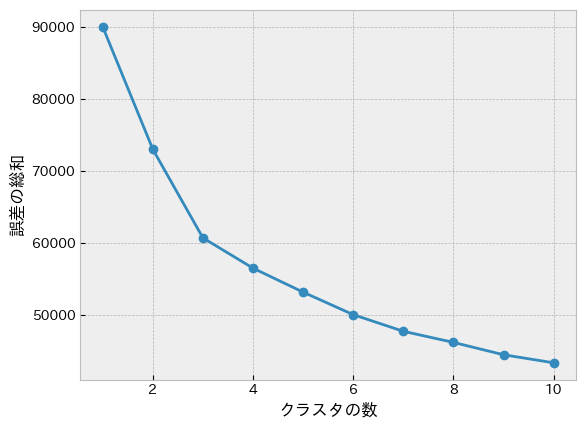

In [ ]:
plt.plot(range(1,11), sse , marker='o')
plt.xlabel('クラスタの数')
plt.ylabel('誤差の総和')
plt.show()

In [ ]:
#クラスタ数３でクラスタリングを実行
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(x_scaled)

cluster = kmeans.labels_
print(cluster)

[0 2 2 ... 0 0 1]


In [ ]:
# cluster、満足度のカラム追加
df['cluster'] = cluster
df.head(2)

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度,cluster
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4,0
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2,2


In [ ]:
groups.size

NameError: name 'groups' is not defined

In [ ]:
# 動画のクラスタ番号と合わせるために、新しいクラスタ番号のマッピングを定義する
cluster_mapping = {0: 1, 1: 2, 2: 0}
# クラスタ番号を置換する
df['cluster'] = df['cluster'].map(cluster_mapping)

# クラスターごとにグループ分け
groups = df.groupby('cluster')
groups.size()

,0
cluster,
0,3299
1,3028
2,3673


In [ ]:
groups.apply(lambda df: df.select_dtypes(include=['number']).agg(['min', 'max', 'mean', 'median']))


年齢    Wifi設備    送迎の便利さ  オンライン予約のしやすさ    ホテルの立地  \
cluster                                                                 
0       min      7.000000  1.000000  0.000000      0.000000  1.000000   
        max     80.000000  5.000000  5.000000      5.000000  5.000000   
        mean    37.274629  2.458927  3.020612      2.659594  2.947257   
        median  36.000000  2.000000  3.000000      3.000000  3.000000   
1       min      7.000000  1.000000  0.000000      0.000000  1.000000   
        max     80.000000  5.000000  5.000000      5.000000  5.000000   
        mean    40.730185  4.013210  4.143329      4.089498  3.948151   
        median  42.000000  4.000000  4.000000      4.000000  4.000000   
2       min      7.000000  1.000000  0.000000      0.000000  1.000000   
        max     80.000000  5.000000  5.000000      5.000000  5.000000   
        mean    40.448680  2.144296  2.323169      1.974680  2.236047   
        median  41.000000  2.000000  2.000000      2.000000  2.000000   

                  食事の満足度   滞在時の快適さ  チェックイン・アウトの接客  その他のサービス       清潔さ  \
cluster                                                                 
0       min     0.000000  1.000000       1.000000  1.000000  0.000000   
        max     5.000000  5.000000       5.000000  5.000000  5.000000   
        mean    1.973628  2.126705       2.814489  3.382540  1.930282   
        median  2.000000  2.000000       3.000000  4.000000  2.000000   
1       min     1.000000  1.000000       1.000000  1.000000  1.000000   
        max     5.000000  5.000000       5.000000  5.000000  5.000000   
        mean    3.741083  3.988771       3.519155  3.791612  3.829590   
        median  4.000000  4.000000       4.000000  4.000000  4.000000   
2       min     1.000000  1.000000       1.000000  1.000000  1.000000   
        max     5.000000  5.000000       5.000000  5.000000  5.000000   
        mean    3.856521  4.163626       3.538797  3.763136  4.044378   
        median  4.000000  4.000000       4.000000  4.000000  4.000000   

                     満足度  cluster  
cluster                            
0       min     1.000000      0.0  
        max     4.000000      0.0  
        mean    2.260988      0.0  
        median  2.000000      0.0  
1       min     2.000000      1.0  
        max     5.000000      1.0  
        mean    3.959379      1.0  
        median  4.000000      1.0  
2       min     1.000000      2.0  
        max     5.000000      2.0  
        mean    3.422543      2.0  
        median  3.000000      2.0

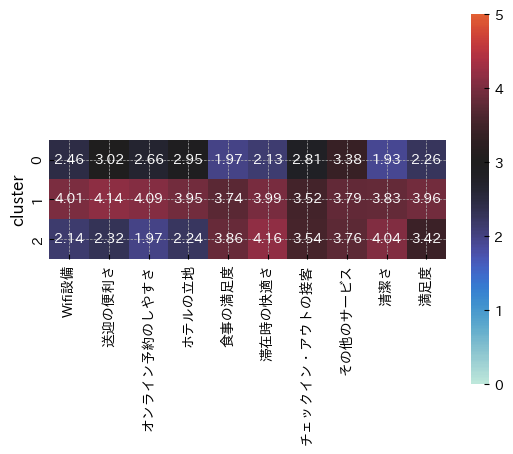

In [ ]:
mean = groups.mean(numeric_only=True).drop('年齢', axis=1, errors='ignore')
sns.heatmap(mean, square=True, annot=True, fmt='.2f', vmax=5.0, center=3.0, vmin=0.0);

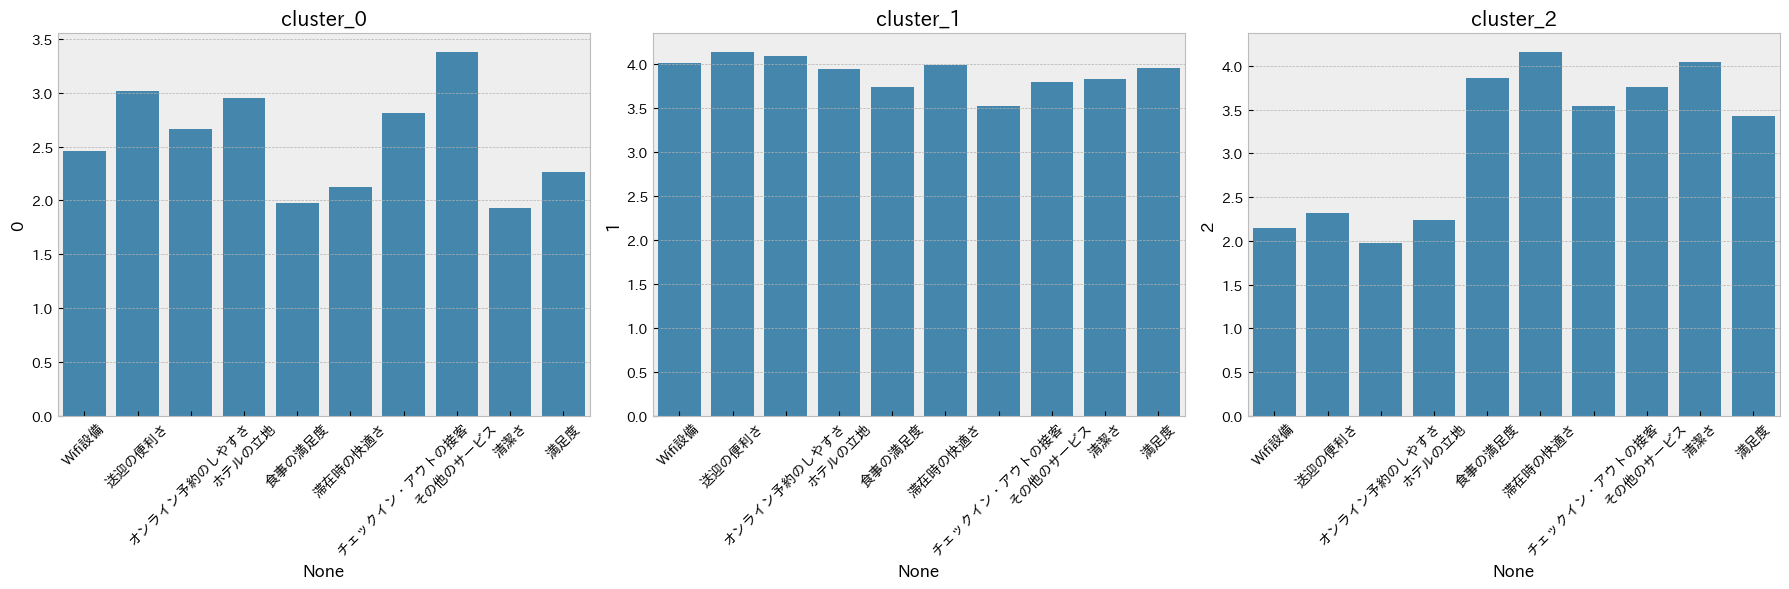

In [ ]:
# クラスタの数を取得
num = kmeans.n_clusters

# クラスターごとに可視化して確認
plt.figure(figsize=(18, 6))


for n in range(num):
    plt.subplot(1, 3, n+1)
    plt.title(f'cluster_{n}')
    sns.barplot(x=mean.columns, y=mean.loc[n])
    plt.xticks(rotation=45) # 凡例を 45 ℃ 傾けて表示
    plt.tight_layout() # 文字の頭などがないように表示

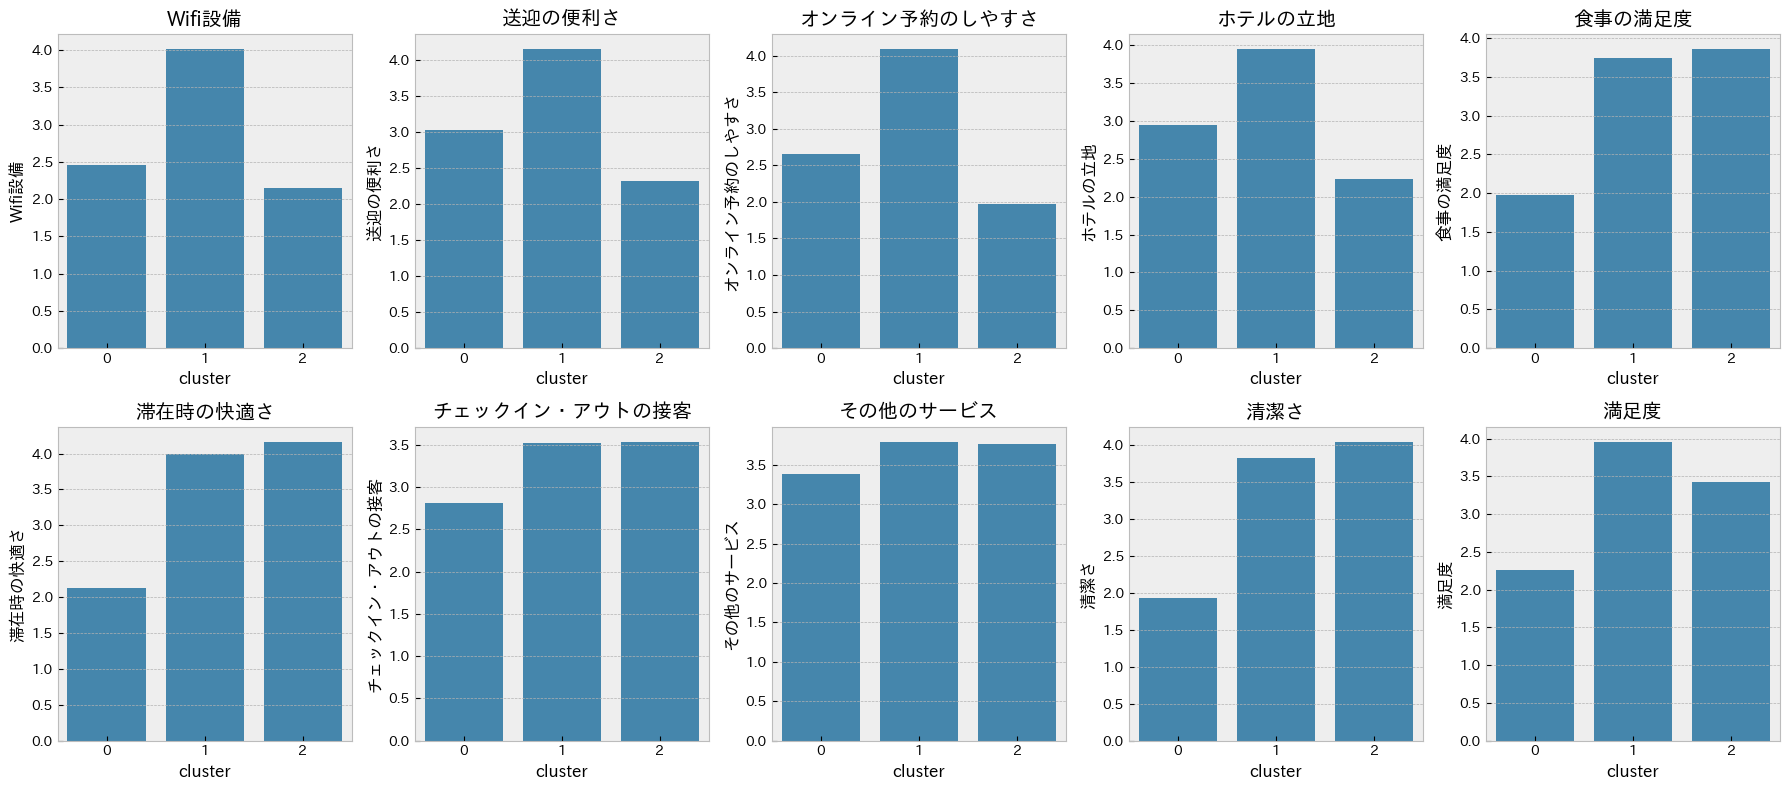

In [ ]:
# 各変数毎に可視化して確認
plt.figure(figsize=(18, 8))

for i, col in enumerate(mean.columns):
    plt.subplot(2, 5, i+1)
    plt.title(f'{col}')
    sns.barplot(x=mean.index, y=mean[col])
    plt.tight_layout()

In [ ]:
# 各クラスターを取得（可視化のためにindexを振り直す）
cluster_0 = groups.get_group(0)
cluster_0 = cluster_0.reset_index(drop=True)
cluster_0.head(2)

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度,cluster
0,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2,0
1,女性,22,グループ,その他,1,1,1,4,1,5,1,3,1,3,0


In [ ]:
cluster_1 = groups.get_group(1)
cluster_1 = cluster_1.reset_index(drop=True)
cluster_2 = groups.get_group(2)
cluster_2 = cluster_2.reset_index(drop=True)

In [ ]:
# 箱ひげ図可視化用の関数
def box_plot(col1, col2, dflist, high=6, width=18):
    plt.rcParams['figure.figsize'] = width, high

    for i, cluster in enumerate(dflist):
        plt.subplot(1, len(dflist), i+1)
        plt.title(f'クラスター{i}：{col1}と{col2}')
        sns.boxplot(x=col1, y=col2, data=cluster)
        plt.tight_layout();

In [ ]:
df_list = [cluster_0, cluster_1, cluster_2]


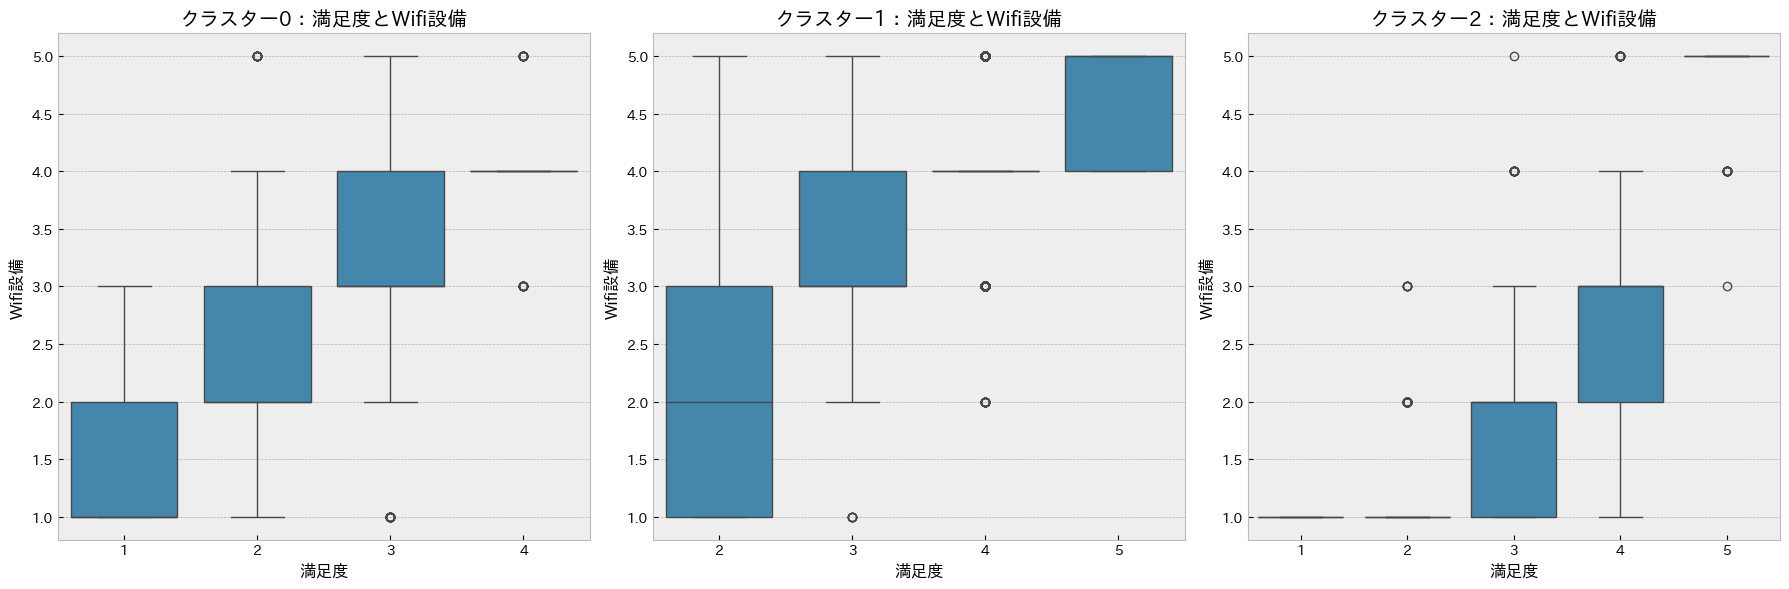

In [ ]:
box_plot('満足度', 'Wifi設備', df_list)


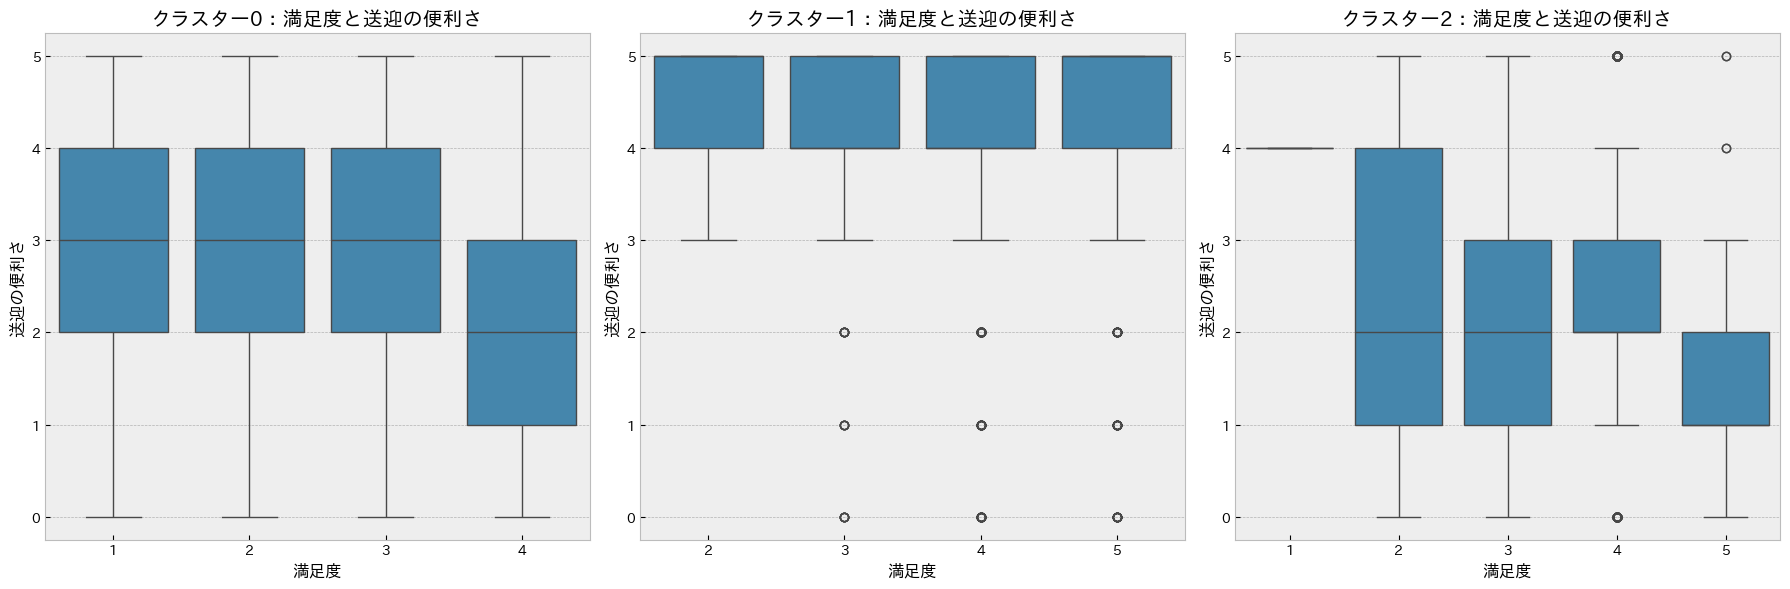

In [ ]:
# 送迎の便利さ
box_plot('満足度', '送迎の便利さ', df_list)


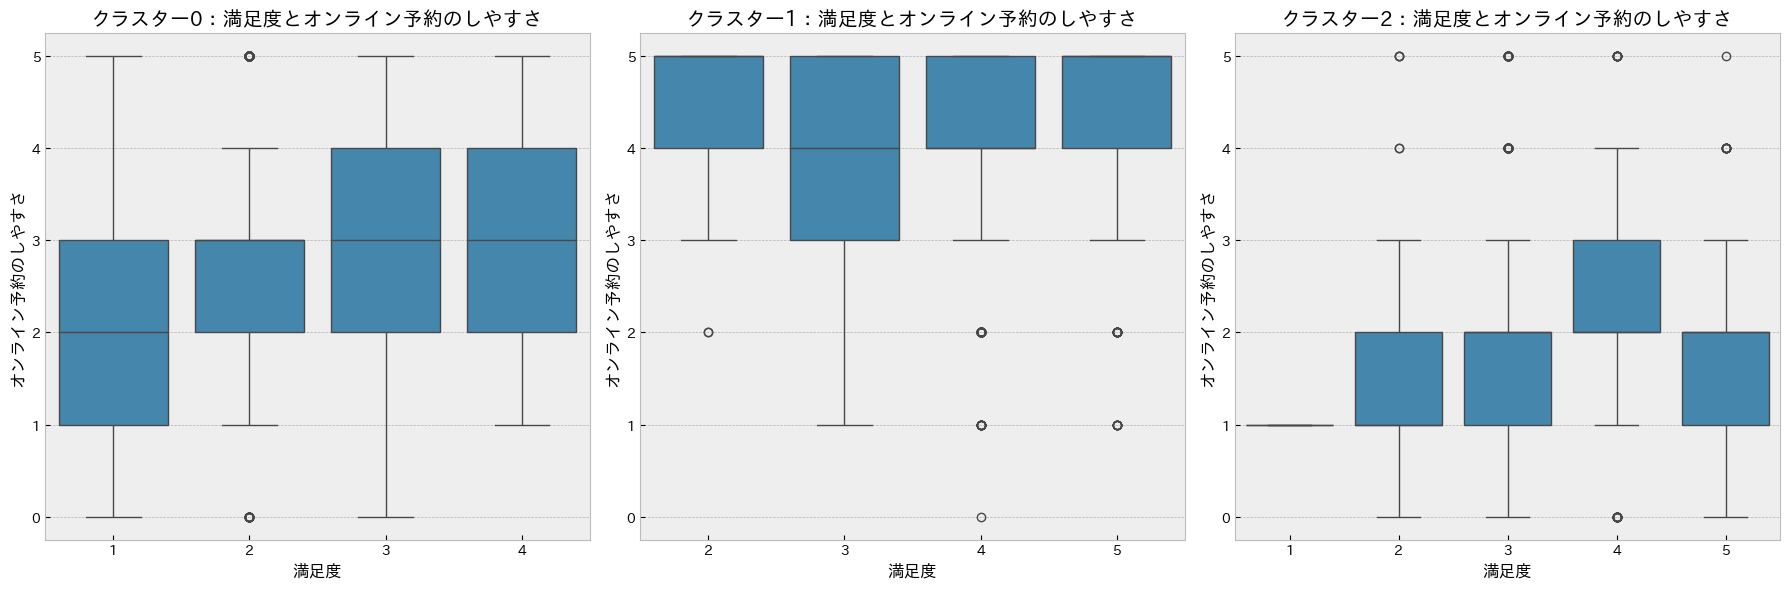

In [ ]:
# オンライン予約のしやすさ
box_plot('満足度', 'オンライン予約のしやすさ', df_list)

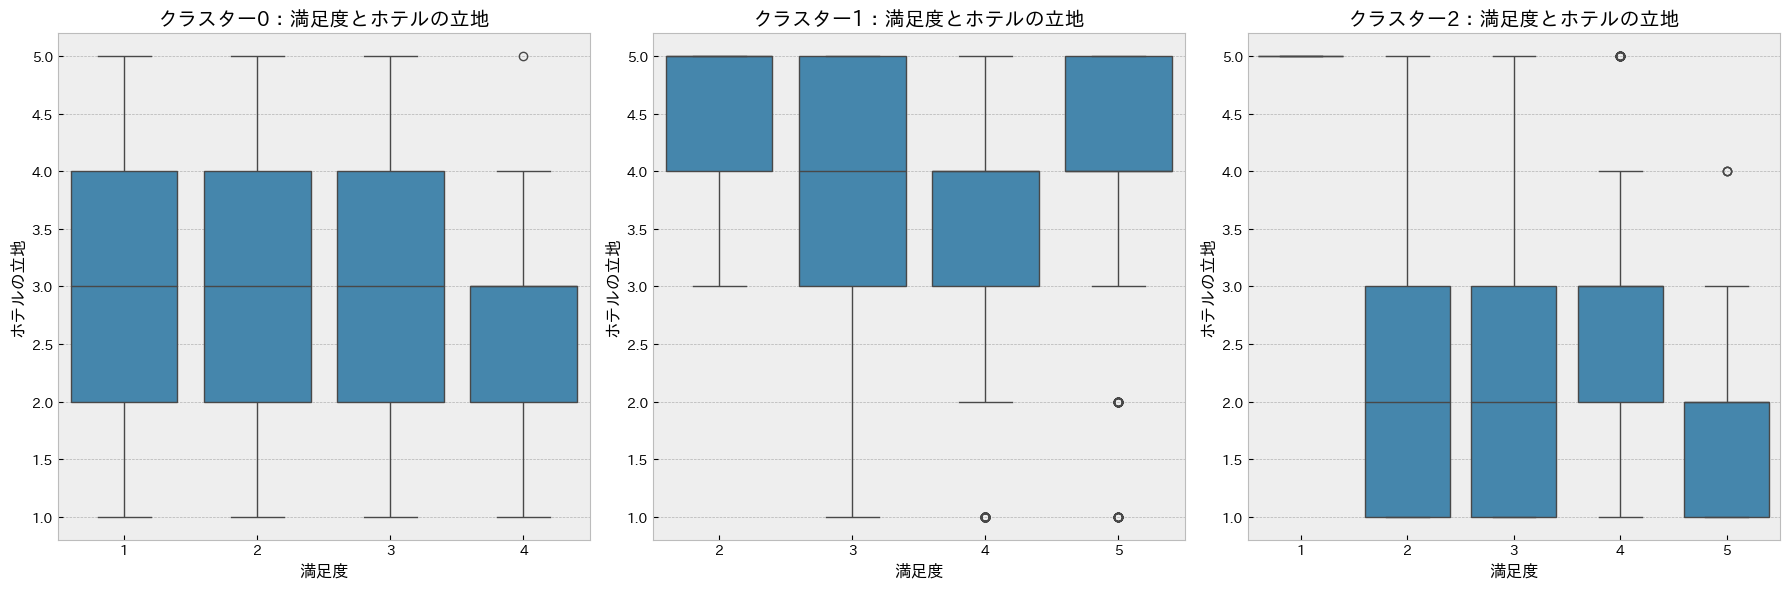

In [ ]:
# ホテルの立地
box_plot('満足度', 'ホテルの立地', df_list)


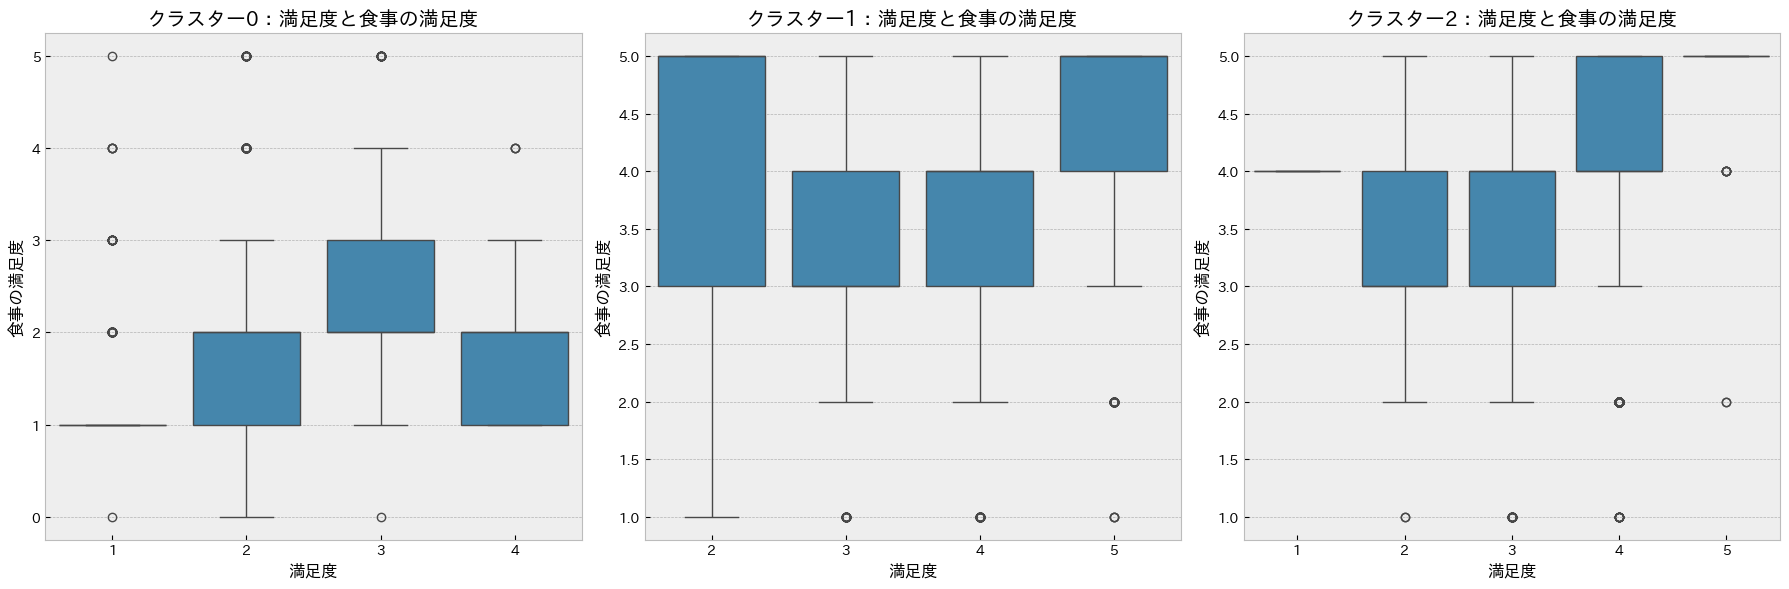

In [ ]:
# 食事の満足度について
box_plot('満足度', '食事の満足度', df_list)

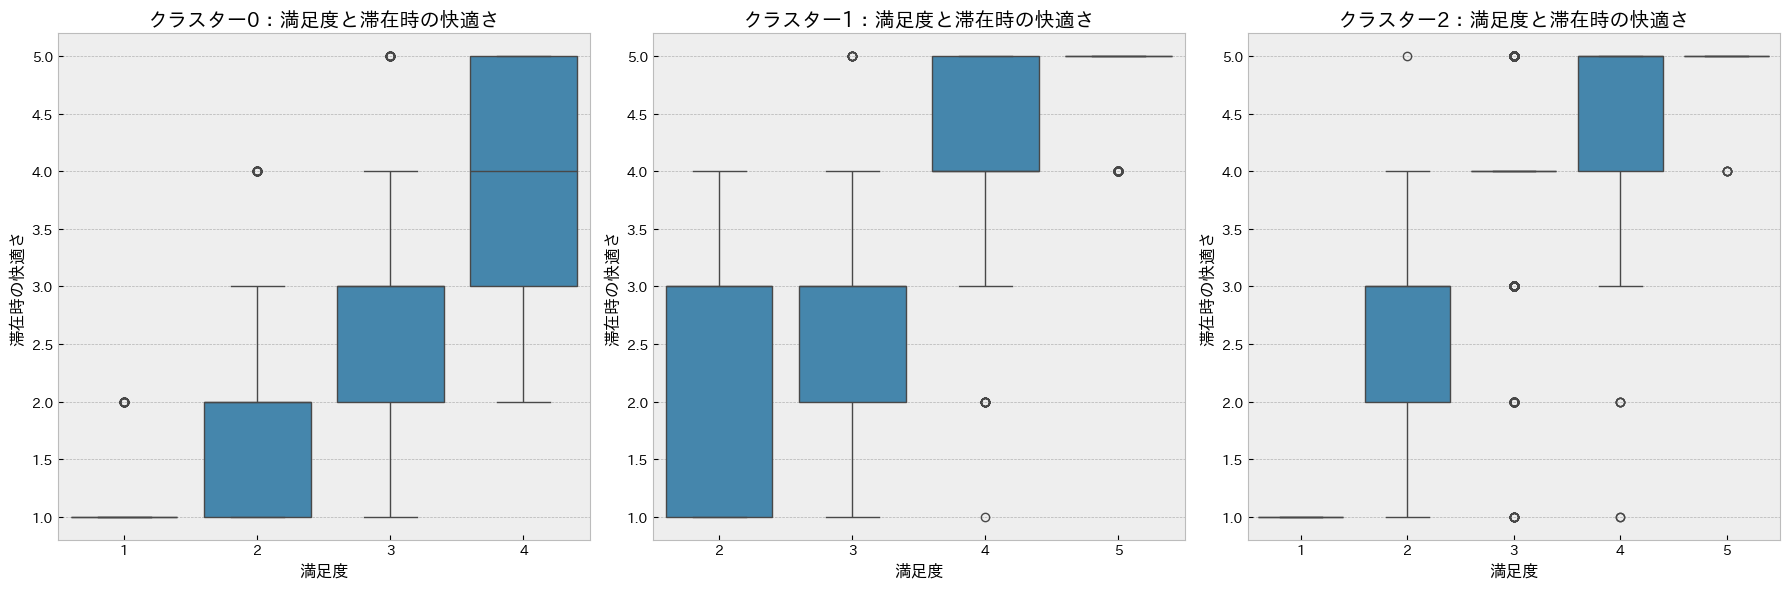

In [ ]:
# 滞在時の快適さについて
box_plot('満足度', '滞在時の快適さ', df_list)

- クラスタ 0
    - 相対的に見て、満足度の平均点が高い高評価レビュークラスタです。

- クラスタ 1, 2
   - クラスタ 0 と相対的に見て、満足度の平均点が低い低評価レビュークラスタです。
   - ただし、クラスタ 1, 2 では傾向が分かれており、主成分分析における第二主成分を軸として分割できそうな傾向も確認できました。

全体の傾向としては、チェックイン・チェックアウト時の接客やその他サービスについて、各クラスタ毎であまり差が見られないことがわかりました。

- （クラスタ内で）満足度と影響関係が見て取れた変数

  - Wifi 設備
  - 滞在時の快適さ
- （クラスタ内で）満足度と影響関係が見て取れなかった変数

  - 送迎の便利さ
  - オンライン予約のしやすさ
  - ホテルの立地
  - 食事の満足度
  - 清潔さ

In [ ]:
!pip install -q japanize_matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 26.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
df = pd.read_csv('hotel_reviews.csv')
df.head()

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2
2,女性,22,グループ,その他,1,1,1,4,1,5,1,3,1,3
3,男性,30,個人,航空関係,3,4,3,4,5,1,4,4,5,3
4,男性,59,グループ,航空関係,4,3,3,3,4,4,3,5,4,4


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# 数値データのみを取得
df_numeric = df.select_dtypes(include='number')
# 年齢列を削除
_df = df_numeric.drop(['年齢', '満足度'], axis=1)
# 標準化
x_scaled = scaler.fit_transform(_df)
x_scaled[0]

array([ 0.94961961,  0.60418417,  0.87068588,  0.79311742, -0.15107264,
        0.42639835,  0.55956515,  0.30271115,  0.5481468 ])

In [ ]:
from sklearn.cluster import KMeans

# クラスラリングの実行
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x_scaled)

# クラスタリングの結果を追加
df['cluster'] = kmeans.labels_
df.head(2)

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度,cluster
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4,0
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2,2


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=0)
feature = pca.fit_transform(x_scaled)
feature_df = pd.DataFrame(feature, columns=['総合評価', 'ホテルの環境評価', '接客の評価'])
new_data = pd.concat([df, feature_df], axis=1)
new_data.head(2)

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度,cluster,総合評価,ホテルの環境評価,接客の評価
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4,0,1.637654,-0.645483,0.390539
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2,2,-0.286120,-3.307718,1.719181


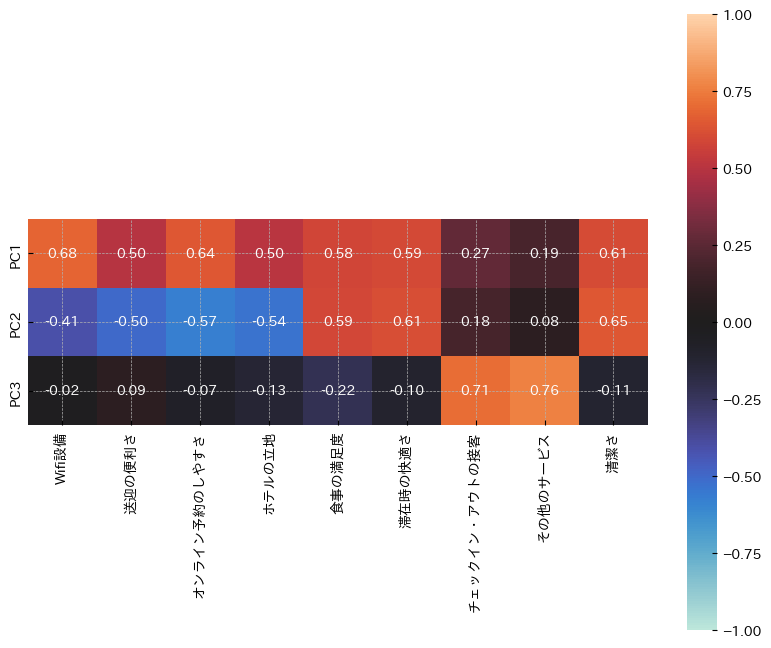

In [ ]:
cols = df_numeric.columns.drop(['年齢', '満足度'])

factor_loading = pca.components_ * np.c_[np.sqrt(pca.explained_variance_)]

df_factor_loading = pd.DataFrame(
    factor_loading,
    index=[f'PC{x+1}' for x in range(len(factor_loading))],
    columns=cols
)

sns.heatmap(df_factor_loading.head(3), vmax=1.0, center=0.0, vmin=-1.0, square=True, annot=True, fmt='.2f');

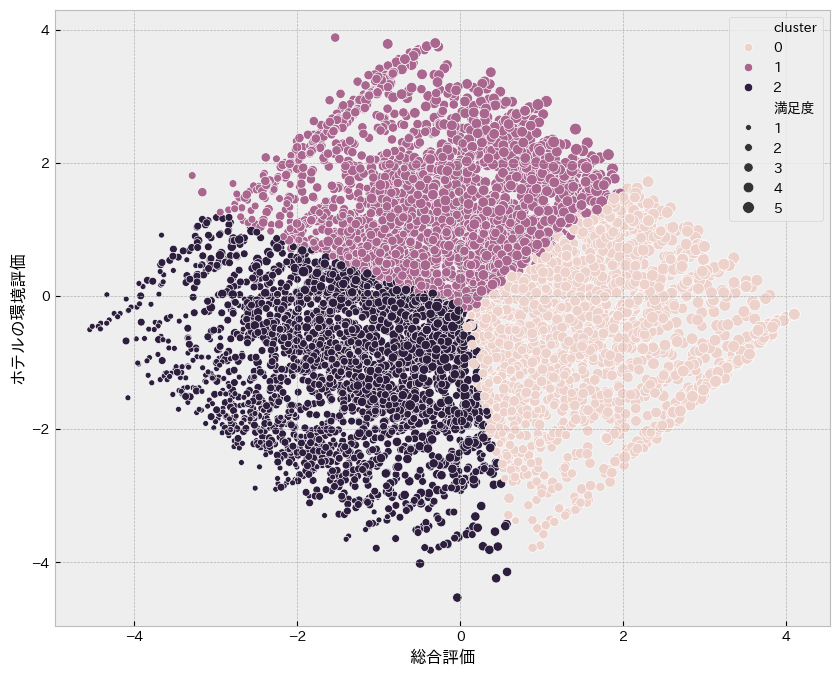

In [ ]:
sns.scatterplot(x='総合評価', y='ホテルの環境評価', hue='cluster', size='満足度', data=new_data);

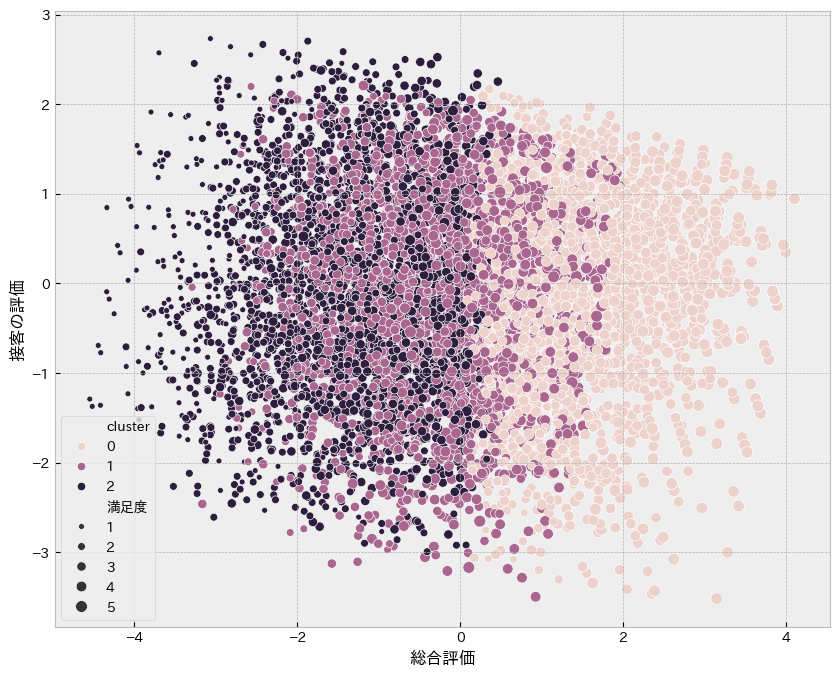

In [ ]:
sns.scatterplot(x='総合評価', y='接客の評価', hue='cluster', size='満足度', data=new_data);


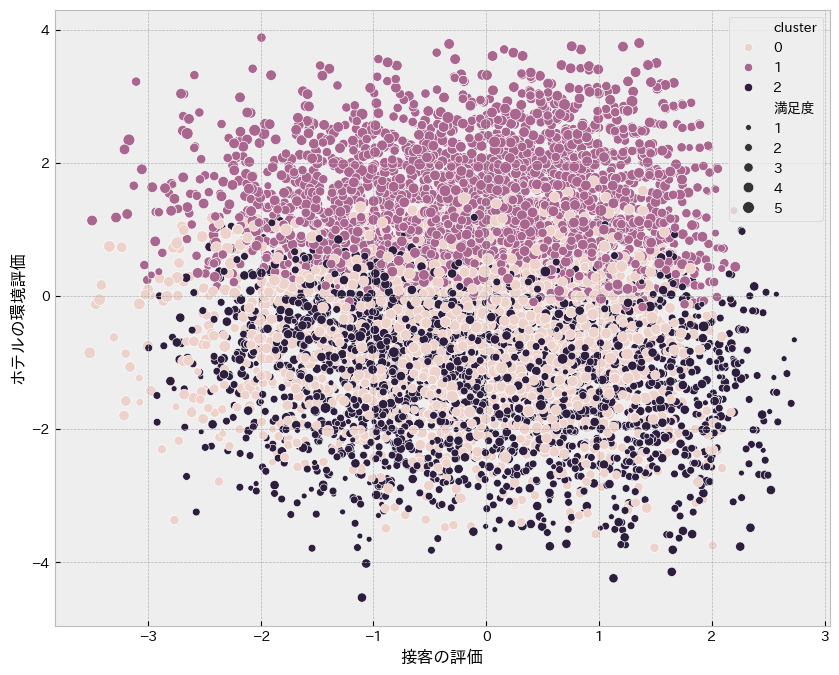

In [ ]:
sns.scatterplot(x='接客の評価', y='ホテルの環境評価', hue='cluster', size='満足度', data=new_data);

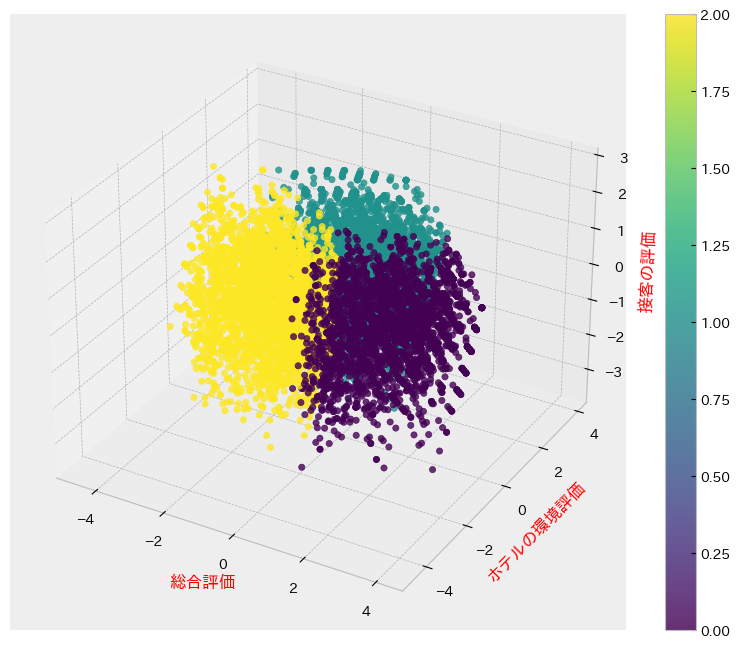

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    new_data['総合評価'],
    new_data['ホテルの環境評価'],
    new_data['接客の評価'],
    alpha=0.8,
    c=list(new_data['cluster'])
)

cbar = fig.colorbar(scatter)

ax.set_xlabel('総合評価', c='r')
ax.set_ylabel('ホテルの環境評価', c='r')
ax.set_zlabel('接客の評価', c='r')

plt.show();


In [ ]:
import numpy as np
from sklearn.linear_model import Lasso

# CSVファイルの読み込み
arr2d_data = np.loadtxt(fname="polyreg30.csv", delimiter=",")

x = arr2d_data[:, 0]  # 1列目が x
y = arr2d_data[:, 1]  # 2列目が y

# xの値を [x, x^2, x^3, x^4, x^5] に変換
list2d_maxX = []
for xi in x:
    list2d_maxX.append([xi, xi**2, xi**3, xi**4, xi**5])

array2d_maxX = np.array(list2d_maxX)

# Lasso回帰のインスタンス (alpha=0.01)
las = Lasso(alpha=0.01)
las.fit(array2d_maxX, y)

# 結果表示
print(f"{las.intercept_:.2f}")      # 切片
for i in range(5):                  # 5つの係数
    print(f"{las.coef_[i]:.2f}")


-1.82
2.61
-1.16
-1.12
0.05
-0.08
